In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pandas as pd
from imblearn.combine import SMOTEENN
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("./dataset/categorical_data_on_fraud.csv")
df

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,'C1093826151','4','M','28007','M348934600','28007',12,4.55,0
1,0,'C352968107','2','M','28007','M348934600','28007',12,39.68,0
2,0,'C2054744914','4','F','28007','M1823072687','28007',12,26.89,0
3,0,'C1760612790','3','M','28007','M348934600','28007',12,17.25,0
4,0,'C757503768','5','M','28007','M348934600','28007',12,35.72,0
...,...,...,...,...,...,...,...,...,...,...
594638,179,'C1753498738','3','F','28007','M1823072687','28007',12,20.53,0
594639,179,'C650108285','4','F','28007','M1823072687','28007',12,50.73,0
594640,179,'C123623130','2','F','28007','M349281107','28007',2,22.44,0
594641,179,'C1499363341','5','M','28007','M1823072687','28007',12,14.46,0


In [5]:
df.age = pd.Series(LabelEncoder().fit_transform(df.age))
df.gender = pd.Series(LabelEncoder().fit_transform(df.gender))
df

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,'C1093826151',4,2,'28007','M348934600','28007',12,4.55,0
1,0,'C352968107',2,2,'28007','M348934600','28007',12,39.68,0
2,0,'C2054744914',4,1,'28007','M1823072687','28007',12,26.89,0
3,0,'C1760612790',3,2,'28007','M348934600','28007',12,17.25,0
4,0,'C757503768',5,2,'28007','M348934600','28007',12,35.72,0
...,...,...,...,...,...,...,...,...,...,...
594638,179,'C1753498738',3,1,'28007','M1823072687','28007',12,20.53,0
594639,179,'C650108285',4,1,'28007','M1823072687','28007',12,50.73,0
594640,179,'C123623130',2,1,'28007','M349281107','28007',2,22.44,0
594641,179,'C1499363341',5,2,'28007','M1823072687','28007',12,14.46,0


In [6]:
x = df[['age', 'gender', 'category', 'amount']]
y = df[['fraud']]

x_res, y_res = SMOTEENN(random_state=1).fit_resample(x, y)
y_res.value_counts()

fraud
1        576636
0        574534
dtype: int64

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x_res, y_res, test_size=0.3, random_state=1, shuffle=True, stratify=y_res)
y_train.value_counts()

fraud
1        403645
0        402174
dtype: int64

In [10]:
log_reg = LogisticRegression(random_state=1)
log_reg.fit(x_train, y_train.values.ravel())

LogisticRegression(random_state=1)

In [11]:
y_pred = log_reg.predict(x_test)

In [14]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[166067   6293]
 [ 18018 154973]]


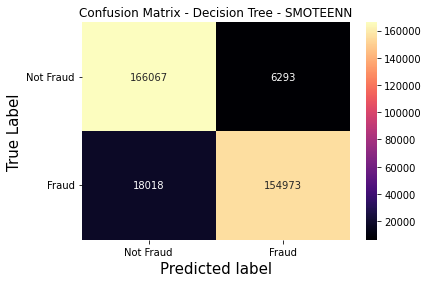

In [18]:
matrix_df = pd.DataFrame(confusion_matrix)

ax = plt.axes()
sns.heatmap(matrix_df, annot=True, fmt="g", ax=ax, cmap="magma")
ax.set_title('Confusion Matrix - Decision Tree - SMOTEENN')
ax.set_xlabel("Predicted label", fontsize =15)
ax.set_xticklabels(['Not Fraud', 'Fraud'])
ax.set_ylabel("True Label", fontsize=15)
ax.set_yticklabels(['Not Fraud', 'Fraud'], rotation = 0)
plt.show()

In [16]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93    172360
           1       0.96      0.90      0.93    172991

    accuracy                           0.93    345351
   macro avg       0.93      0.93      0.93    345351
weighted avg       0.93      0.93      0.93    345351



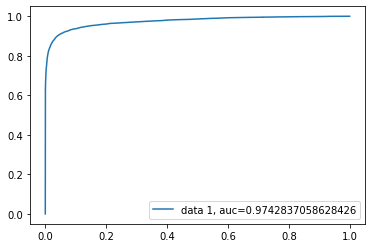

In [17]:
y_pred_proba = log_reg.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()